<a href="https://colab.research.google.com/github/SumitNikhade/Machine-learning/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
X = pd.read_csv('CC GENERAL.csv')
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)
# Handling the missing values
X.fillna(method ='ffill', inplace = True)

<ipython-input-5-abac9d006a43>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


In [ ]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

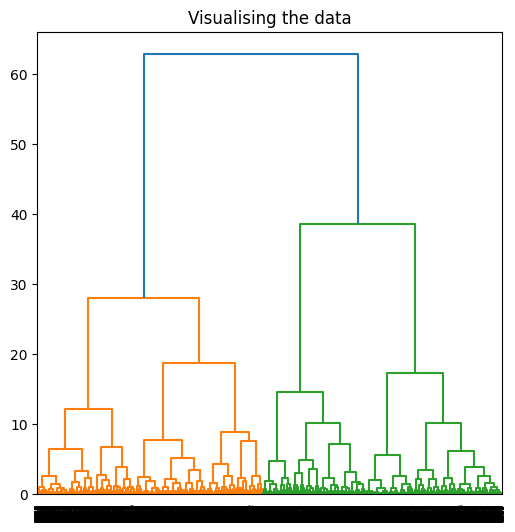

In [ ]:
plt.figure(figsize =(6, 6))
plt.title('Visualising the data')
Dend = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
plt.show()

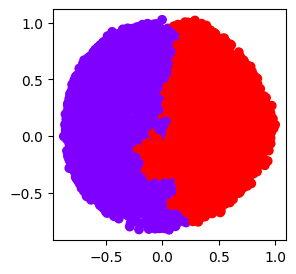

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(3, 3))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

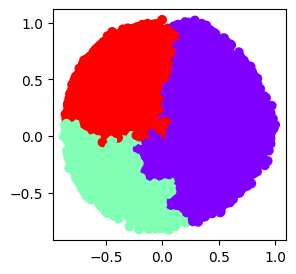

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(3, 3))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

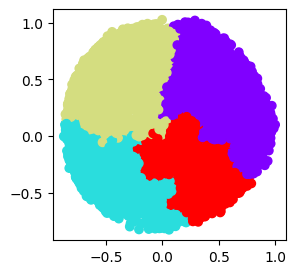

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(3, 3))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

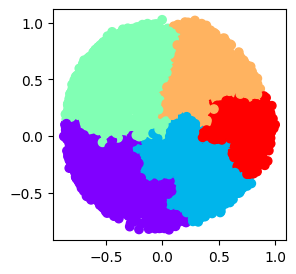

In [ ]:
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(3, 3))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

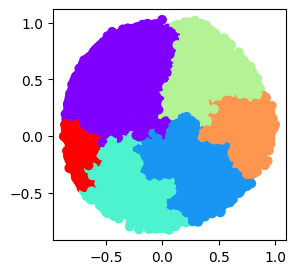

In [ ]:
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(3, 3))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

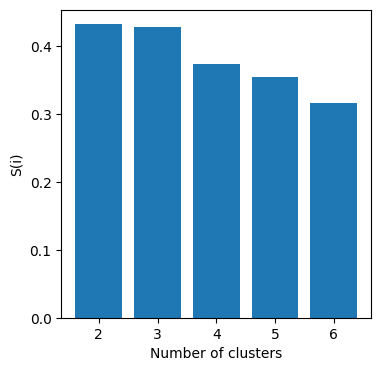

In [ ]:
k = [2, 3, 4, 5, 6]
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
# Plotting a bar graph to compare the results
fig = plt.figure(figsize = (4, 4))
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('S(i)', fontsize = 10)
plt.show()